Step 1: Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 2: Load the Dataset


In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a Pandas DataFrame from the data and feature names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a new column named 'species' to the DataFrame
# This column will contain the target labels (types of Iris flowers)
df['species'] = iris.target

# Display the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 3: Data Exploration


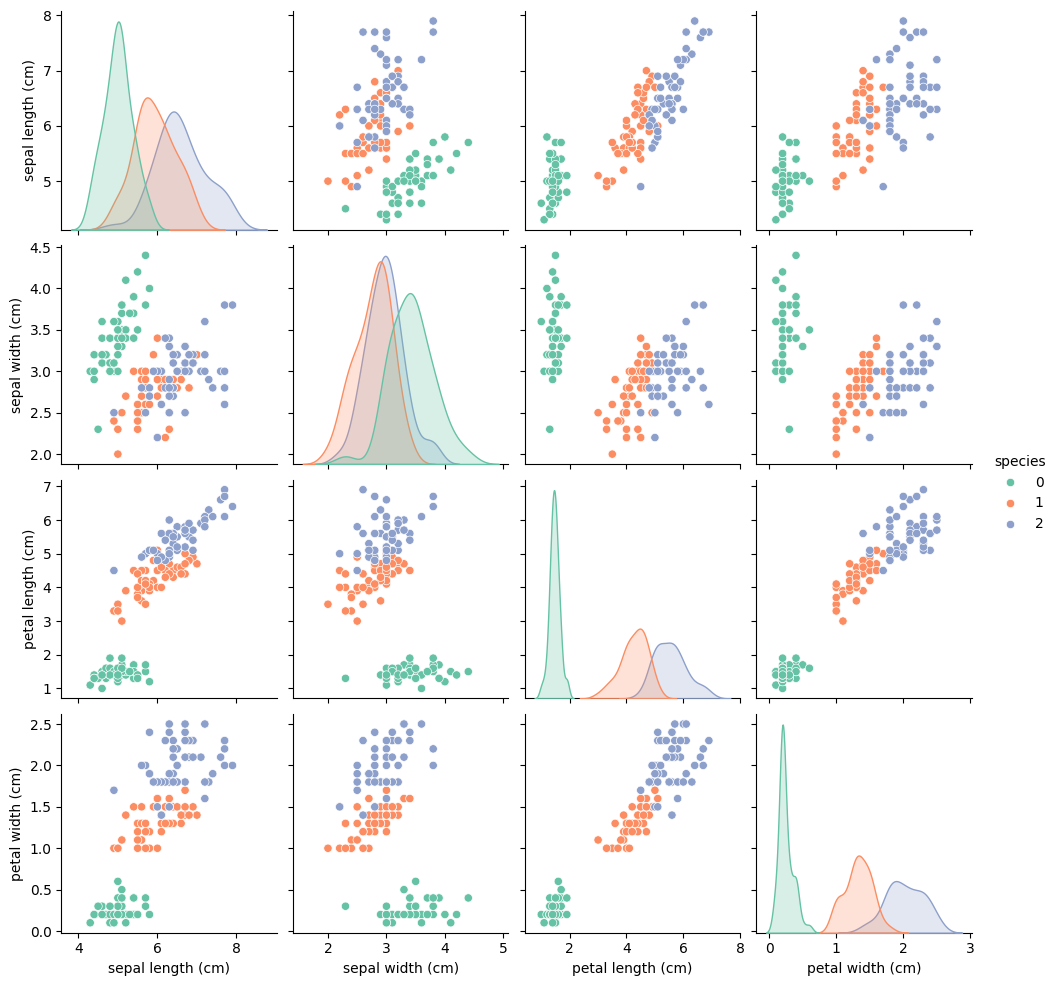

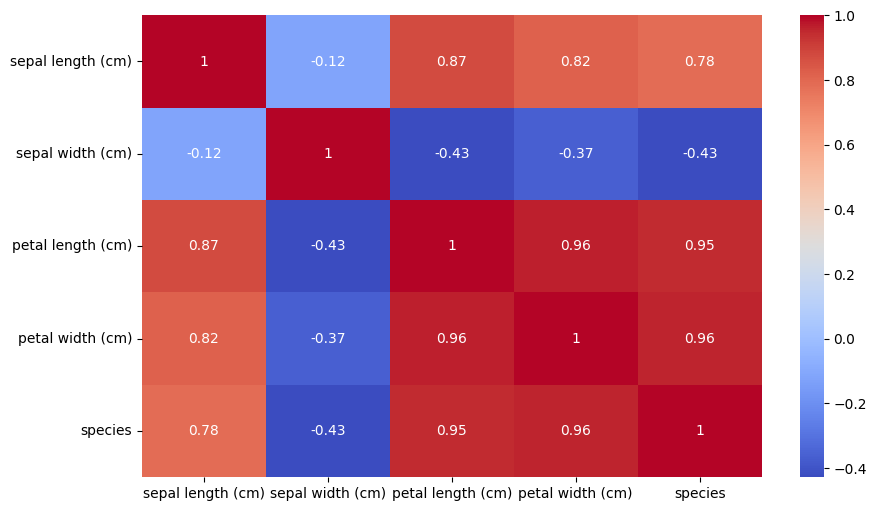

In [3]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='Set2') #hue='species': This tells the pairplot to color-code the data points based on the 'species' column
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Step 4: Data Preprocessing


In [4]:
# Split the data into features and target
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training

In [5]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)


Model Evaluation

In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



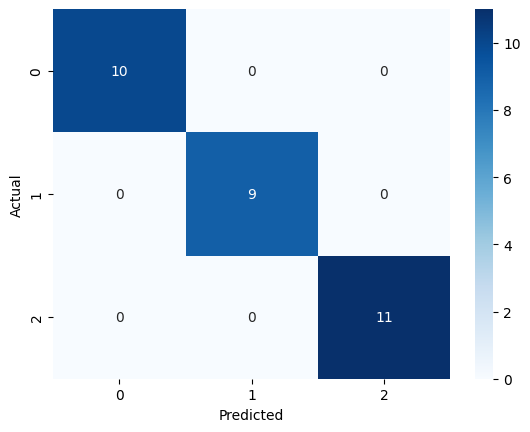

In [7]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance (Using Random Forest)


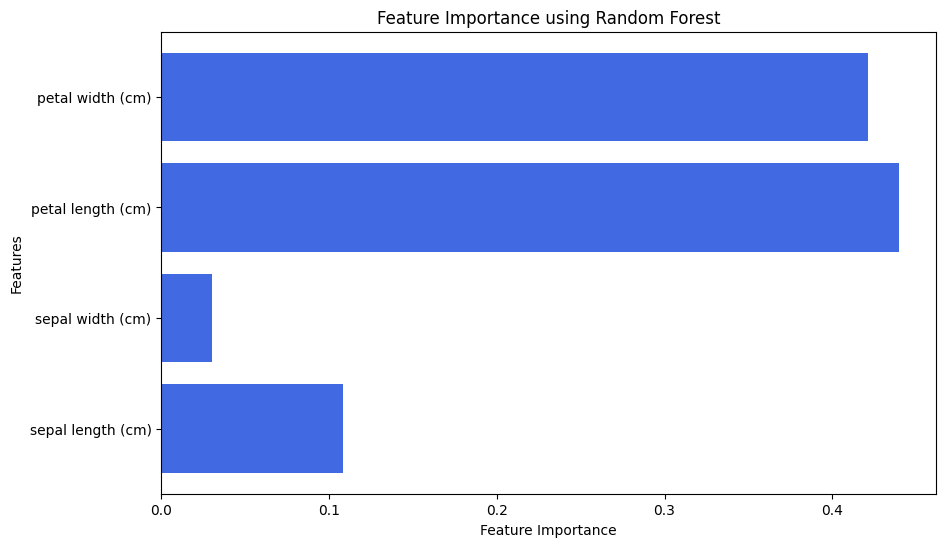

In [8]:
# This will help you understand which features contribute most to the classification.



from sklearn.ensemble import RandomForestClassifier


# Assuming X_train and y_train are already defined
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_
#Correct feature names from the Iris dataset
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='royalblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.show()


In [9]:
# Alternative models
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_accuracy = gb.score(X_test, y_test)

print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')


Gradient Boosting Accuracy: 1.00


In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)

print(f'SVM Accuracy: {svm_accuracy:.2f}')


SVM Accuracy: 0.97


Hyperparameter tuning


In [11]:
from sklearn.model_selection import GridSearchCV

# Example for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid.best_params_)
print("Best accuracy with these parameters: ", grid.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, 

Cross-Validation


In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(f'Random Forest 10-Fold CV Accuracy: {cv_scores_rf.mean():.2f} ± {cv_scores_rf.std():.2f}')

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
print(f'SVM 10-Fold CV Accuracy: {cv_scores_svm.mean():.2f} ± {cv_scores_svm.std():.2f}')


Random Forest 10-Fold CV Accuracy: 0.96 ± 0.03
SVM 10-Fold CV Accuracy: 0.97 ± 0.04


Model Comparison


In [13]:

# Compute accuracy for KNN on the test set
knn_accuracy = knn.score(X_test, y_test)

# cross-validation for KNN,
from sklearn.model_selection import cross_val_score
cv_scores_knn = cross_val_score(knn, X, y, cv=5)

from sklearn.model_selection import cross_val_score

# Cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb, X, y, cv=5)

# Summarize the results including KNN
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN']
accuracies = [rf.score(X_test, y_test), gb_accuracy, svm_accuracy, knn_accuracy]
cv_accuracies = [cv_scores_rf.mean(), cv_scores_gb.mean(), cv_scores_svm.mean(), cv_scores_knn.mean()]

comparison_df = pd.DataFrame({
    'Model': models,
    'Test Set Accuracy': accuracies,
    'Cross-Validated Accuracy': cv_accuracies
})

print(comparison_df)


               Model  Test Set Accuracy  Cross-Validated Accuracy
0      Random Forest           1.000000                  0.960000
1  Gradient Boosting           1.000000                  0.960000
2                SVM           0.966667                  0.973333
3                KNN           1.000000                  0.966667
